Mini Portfolio Statistics

## Import Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

#read dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Check about Dataset

In [26]:
df.shape

(1460, 81)

In [7]:
df.duplicated().any()

False

## Number 1

### Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)!

In [21]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [29]:
print('Rata - rata harga rumah adalah', df['SalePrice'].mean())
print('Median harga rumah adalah', int(df['SalePrice'].median()))
print('Modus harga rumah adalah', df['SalePrice'].mode()[0])

print('Range yang didapatkan sebesar', df['SalePrice'].max() - df['SalePrice'].min())

Rata - rata harga rumah adalah 180921.19589041095
Median harga rumah adalah 163000
Modus harga rumah adalah 140000
Range yang didapatkan sebesar 720100


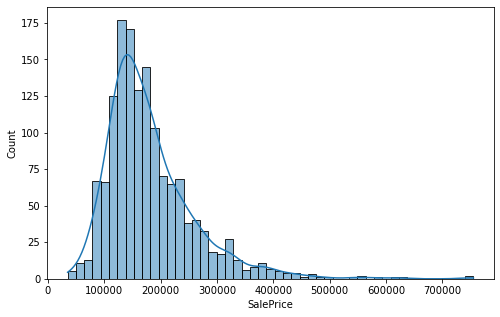

In [20]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'SalePrice', data = df, kde = True);

<p>- Jenis distribusi pada grafik di atas adalah distribusi yang positively skewd atau menceng ke kanan<br>
    - Terdapat 1460 yang dimana mempresentasikan jumlah rumah <br>
    - Karena grafik tersebut positively skewd, maka rata - rata harga rumah lebih tinggi dibanding median nya<br>
    - Jumlah rata rata harga rumah adalah 180921.19589041095 dengan standard deviation 79442.502883. Standard Deviation yang cenderung tinggi karena terdapat banyak outliers<br>
    - Memiliki Median harga rumah sebesar 163000<br>
    - Range yang didapatkan sebesar 720100. Yang dimana cukup besar karena adanya outliers</p>

## Number 2

### Tunjukkan statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!
Secara deskriptif jelaskan apakah ada perbedaan setiap tahunnya 
atau tidak?

In [2]:
df_grouped = df.groupby(['YrSold'])['SalePrice'].describe().reset_index()
df_grouped['Range'] = df_grouped['max'] - df_grouped['min']
df_grouped

,YrSold,count,mean,std,min,25%,50%,75%,max,Range
0,2006,314.0,182549.458599,79426.838855,35311.0,131375.0,163995.0,218782.5,625000.0,589689.0
1,2007,329.0,186063.151976,85768.171410,39300.0,129900.0,167000.0,219500.0,755000.0,715700.0
2,2008,304.0,177360.838816,69735.610685,40000.0,131250.0,164000.0,207000.0,446261.0,406261.0
3,2009,338.0,179432.103550,80879.237311,34900.0,125250.0,162000.0,212750.0,582933.0,548033.0
4,2010,175.0,177393.674286,80451.280085,55000.0,128100.0,155000.0,213250.0,611657.0,556657.0


In [12]:
df_2008 = df.loc[df['YrSold'] == 2007]
df_2008.sort_values(['SalePrice'], ascending = False).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1373,1374,20,RL,NaN,11400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,466500
473,474,20,RL,110.0,14977,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,440000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000


In [11]:
df_2008 = df.loc[df['YrSold'] == 2008]
df_2008.sort_values(['SalePrice'], ascending = False).head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
161,162,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,412500
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617
1181,1182,120,RM,64.0,5587,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,392500


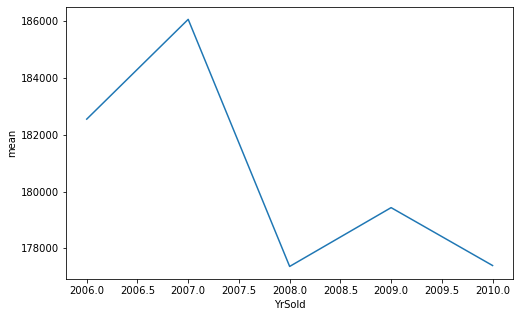

In [3]:
plt.figure(figsize = (8,5))
sns.lineplot(x = 'YrSold', y = 'mean', data = df_grouped);

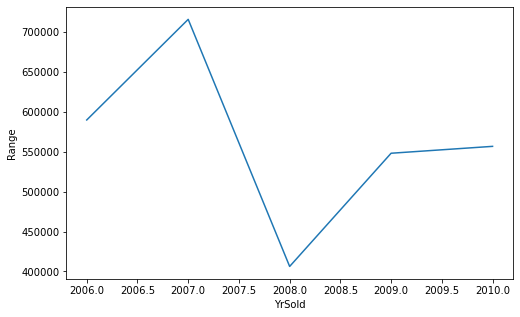

In [5]:
plt.figure(figsize = (8,5))
sns.lineplot(x = 'YrSold', y = 'Range', data = df_grouped);

<p>Menurut beberapa grafik di atas, terjadi penurunan drastis harga rumah di tahun 2008. Karena krisis tersebut yang membuat mean dan range harga rumah juga menurun. Pada tahun 2008, harga rumah termahal menurun yang menyebabkan nilai Range juga menurun.</p>

## Number 3

### Bagaimana distribusi harga rumah tersebut. Gunakan histogram plot tidak terbatas hanya histogram saja. Jelaskan sebaiknya untuk analisa apakah lebih baik menggunakan mean atau menggunakan median? Beserta alasannya (Column Name : SalePrice)
Ceritakan analisa tersebut dengan sudut pandang statistika.

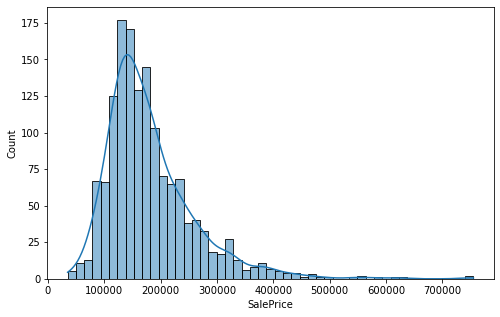

In [16]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'SalePrice', data = df, kde = True);

<p>Client lebih banyak membeli rumah di harga kisaran 100k sampai 200k. Distribusi pada grafik di atas merupakan distribusi Positively Skewed atau menceng ke kanan. Yang dimana rata - rata harga rumah lebih besar dari median nya karena ada banyak outliers. Untuk analisis lanjut, sebaiknya menggunakan <b>median</b> karena median robust atau kokoh terhadap outliers. Tidak disarankan menggunakan mean untnuk analisis lebih lanjut karena tidak robust terhadap outliers.</p>

## Number 4

### Karena ada pernyataan bahwa setiap tahunnya harga rumah itu pasti naik. (tahun terjual : YrSold, harga rumah : SalePrice) Silahkan teman-teman buktikan dengan data yang ada menggunakan ilmu statistika? (Tidak terbatas pada pengujian apapun)

In [3]:
df_grup = df.groupby(['YrSold']).agg({'SalePrice' : 'mean'}).reset_index()
df_rename = df_grup.rename(columns = {'SalePrice' : 'Mean_SalePrice'})
df_rename

,YrSold,Mean_SalePrice
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


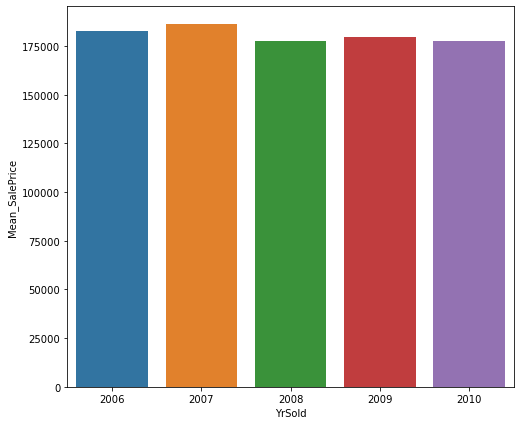

In [98]:
plt.figure(figsize = (8,7))
sns.barplot(x = 'YrSold', y = 'Mean_SalePrice', data = df_rename);

Pengujian menggunakan ANOVA karena populasi lebih dari 2

In [4]:
#filtering year
df2006 = df.loc[df['YrSold'] == 2006]
df2007 = df.loc[df['YrSold'] == 2007]
df2008 = df.loc[df['YrSold'] == 2008]
df2009 = df.loc[df['YrSold'] == 2009]
df2010 = df.loc[df['YrSold'] == 2010]

In [88]:
#Mean SalePrice tahun 2006
df2006['SalePrice'].mean()

182549.4585987261

In [89]:
#Mean SalePrice tahun 2007
df2007['SalePrice'].mean()

186063.1519756839

In [90]:
#Mean SalePrice tahun 2008
df2008['SalePrice'].mean()

177360.83881578947

In [91]:
#Mean SalePrice tahun 2009
df2009['SalePrice'].mean()

179432.10355029587

In [92]:
#Mean SalePrice tahun 2010
df2010['SalePrice'].mean()

177393.67428571428

In [105]:
#H0 = tiap tahun harganya sama
#H1 = ada yang dimana tahun sama tahun bedanya signifikan

anova_test = st.f_oneway(df2006['SalePrice'], df2007['SalePrice'], df2008['SalePrice'], df2009['SalePrice'], df2010['SalePrice'])
statistic = anova_test[0]
pvalue = anova_test[1]

print('Nilai Pvalue yang didapatkan sebesar', round(pvalue, 2))

if pvalue > 0.05:
    print('Test hipotesis menggunakan Anova menjelaskan bahwa harga rumah dari tahun ke tahun adalah sama. Karena dengan pvalue yang bernilai ' + str(pvalue) + ' melebihi nilai alpha (0.05)')
else:
    print('Test hipotesis menggunakan Anova menjelaskan bahwa harga rumah dari tahun ke tahun berbeda signifikan. Karena dengan pvalue yang bernilai ' + str(pvalue) + ' tidak melebihi nilai alpha (0.05)')

Nilai Pvalue yang didapatkan sebesar 0.63
Test hipotesis menggunakan Anova menjelaskan bahwa harga rumah dari tahun ke tahun adalah sama. Karena dengan pvalue yang bernilai 0.6300887663573457 melebihi nilai alpha (0.05)


## Number 5

### Kasus yang akan digunakan adalah membuka akun deposit untuk nasabah bank. Pada kesempatan kali ini data scientist diminta tolong untuk menganalisa hasil ab-testing suatu perusahaan bank. Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit atau tidak?

<p><b>Nama Experiment</b>: Apakah jumlah campaign mampu meningkatkan keinginan user untuk membuka akun deposit? <br>
    <b>Hipotesis</b>: Jumlah campaign memengaruhi user untuk membuka akun deposit <br>
    <b>Participant</b>: Customer Bank <br>
    <b>Variable yang akan diuji</b>: Jumla Campaign <br>
    <b>Metrics Macroconversions</b>: y(deposit) <br>
    <b>Metrics Microconversions</b>: Jumlah Campaign <br>
    <b>Vanity Metrics</b>: Jumlah customer bank <br>
    <b>Sample Size</b> = 45211 <br>
    <b>Duration</b> = 1 Tahun (Jan - May)</p>

In [106]:
df_bank = pd.read_csv('bank-full.csv', sep = ';')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [126]:
df_no = df_bank.loc[df_bank['y'] == 'no']
df_yes = df_bank.loc[df_bank['y'] != 'no']

In [127]:
df_no.shape

(39922, 17)

In [128]:
df_yes.shape

(5289, 17)

In [129]:
df_grouped = df_bank.groupby(['y']).agg({'campaign' : 'mean'}).reset_index()
df_grouped

,y,campaign
0,no,2.846350
1,yes,2.141047


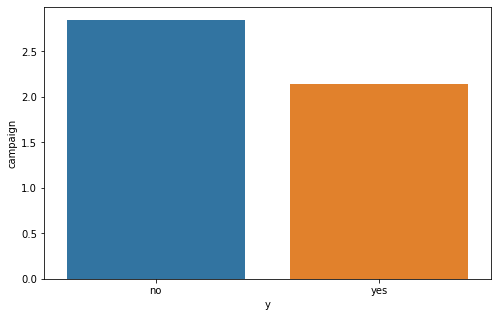

In [131]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'y', y = 'campaign', data = df_grouped);

In [132]:
ttest = st.ttest_ind(df_no['campaign'], df_yes['campaign'])

print('Nilai Pvalue yang didapat sebesar', ttest.pvalue)

if ttest.pvalue >= 0.05:
    print('H0: Jumlah campaign tidak mempengaruhi customer untuk membuka deposit')
else:
    print('H1: Jumlah campaign mempengaruhi customer untuk membuka deposit')

Nilai Pvalue yang didapat sebesar 1.0123473642096297e-54
H1: Jumlah campaign mempengaruhi customer untuk membuka deposit
